In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Data Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Target variables:
Number of predicted wins (W)

In [4]:
#getting basic info fo the data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values present in any feature of the dataset

In [10]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [103]:
df.shape

(30, 17)

The dataset contains :

1. Number of columns = 17
2. number of rows = 30

All the features have numeric values,either int or float

In [11]:
#statistical analysis

In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [36]:
print("observations:")
for i in df.columns:
    print("Mean of the ",i,"is :", round(df[i].mean(),3))
    print("Median of the ",i,"is :",round(df[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(df[i].std(),3))
    print("Minimum value of ",i,"is :", round(df[i].min(),3))
    print("Maximum value of ",i,"is :", round(df[i].max(),3))
    
    x = input('conclusion : \n')
    print("\n\n")

observations:
Mean of the  W is : 80.967
Median of the  W is : 81.0
Standard deviation of  W is : 10.453
Minimum value of  W is : 63
Maximum value of  W is : 100
conclusion : 
Mean an Median is almost same means either very less skewness or no skewness.Standard deviation is high which means data is spreaded.Not much difference between maximum value nad 75th percentile means outliers are present either very small or none.



Mean of the  R is : 688.233
Median of the  R is : 689.0
Standard deviation of  R is : 58.762
Minimum value of  R is : 573
Maximum value of  R is : 891
conclusion : 
Mean an Median is almost same means either very less skewness or no skewness.Standard deviation is very high which means data is highly spreaded.Large difference between maximum value and 75th percentile means outliers are present.



Mean of the  AB is : 5516.267
Median of the  AB is : 5510.0
Standard deviation of  AB is : 70.467
Minimum value of  AB is : 5385
Maximum value of  AB is : 5649
conclusion :

In [37]:
#data visualization

In [43]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

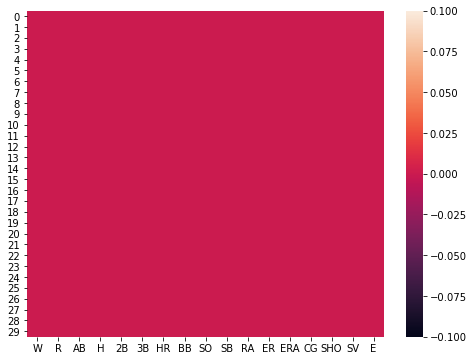

In [41]:
#checking null values
plt.figure(figsize=[8,6] )
sns.heatmap(df.isnull())

No null values are present in the data

In [50]:
#plotting distribution graph
df_visuals_cont = df[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']]

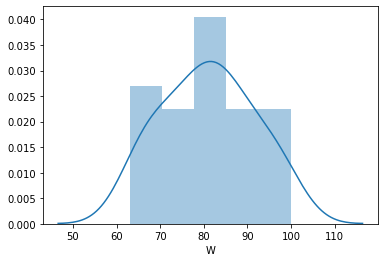

In [53]:
sns.distplot(df_visuals_cont["W"],kde =True )

No skewness is present but highly spreaded between 60 to 100

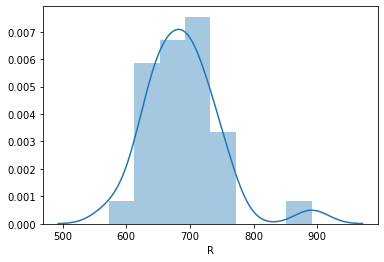

In [54]:
sns.distplot(df_visuals_cont["R"],kde =True )

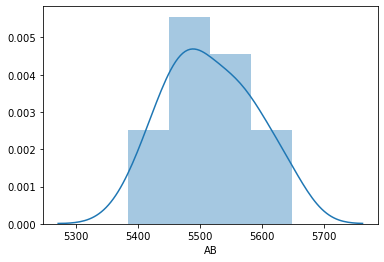

In [55]:
sns.distplot(df_visuals_cont["AB"],kde =True )

Data is normally distributed but highly spreaded between 5400 to 5700

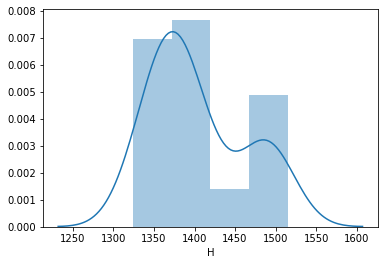

In [58]:
sns.distplot(df_visuals_cont["H"],kde =True )

Slightly right skewed

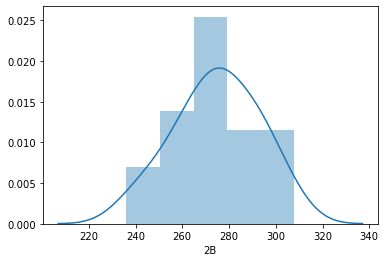

In [60]:
sns.distplot(df_visuals_cont["2B"],kde =True )

slightly Left Skewed

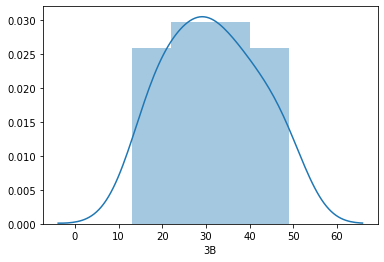

In [61]:
sns.distplot(df_visuals_cont["3B"],kde =True )

Equally distributed but highly spreaded between 10 to 50.

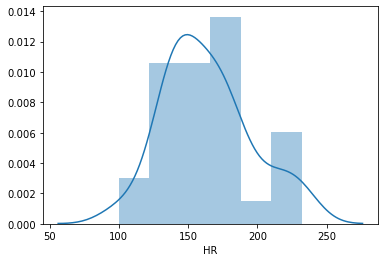

In [62]:
sns.distplot(df_visuals_cont["HR"],kde =True )

Slight Right Skewed

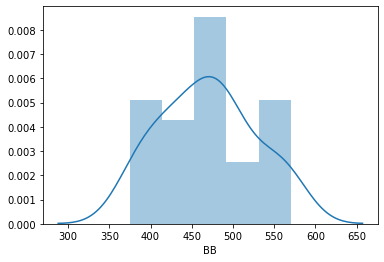

In [64]:
sns.distplot(df_visuals_cont["BB"],kde =True )

Highly distributed between 350 to 600

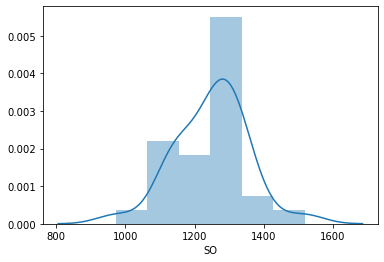

In [65]:
sns.distplot(df_visuals_cont["SO"],kde =True )

The data is more concentrated towards the left.

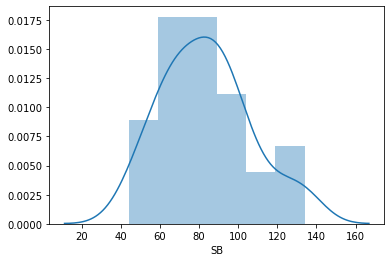

In [66]:
sns.distplot(df_visuals_cont["SB"],kde =True )

Normaly distributed from 40 to 100 but little bit right skewed afterwards.

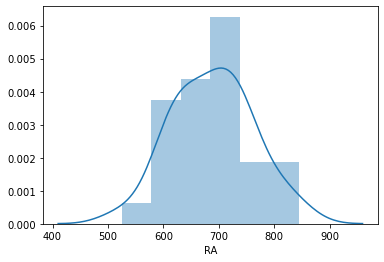

In [67]:
sns.distplot(df_visuals_cont["RA"],kde =True )

Highly distributed between 500 to 800

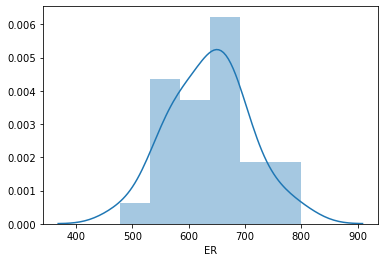

In [68]:
sns.distplot(df_visuals_cont["ER"],kde =True )

Almost Equally distributed.No skewness

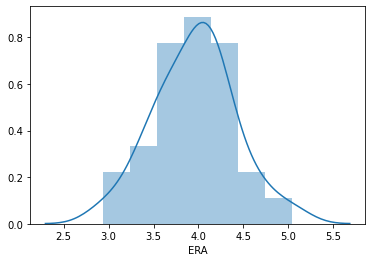

In [69]:
sns.distplot(df_visuals_cont["ERA"],kde =True )

Equally distributed

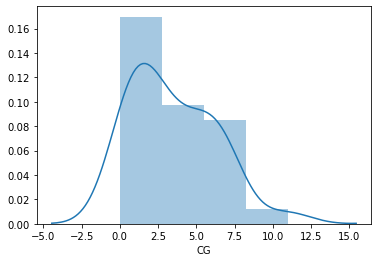

In [70]:
sns.distplot(df_visuals_cont["CG"],kde =True )

Data is highly concentrated towards left.Left Skewed

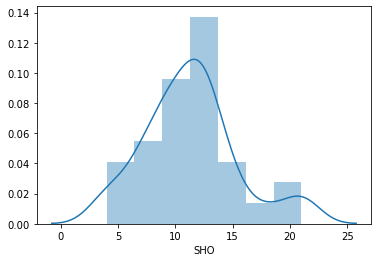

In [71]:
sns.distplot(df_visuals_cont["SHO"],kde =True )

Slightly right skewed

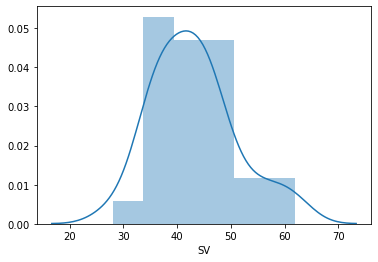

In [72]:
sns.distplot(df_visuals_cont["SV"],kde =True )

Distributed between 30 to 50 afterwards slightly right skewed.

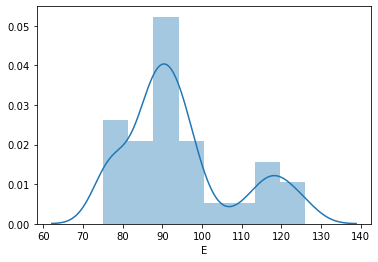

In [73]:
sns.distplot(df_visuals_cont["E"],kde =True )

Not normally distributed

In [75]:
#using pair plot 

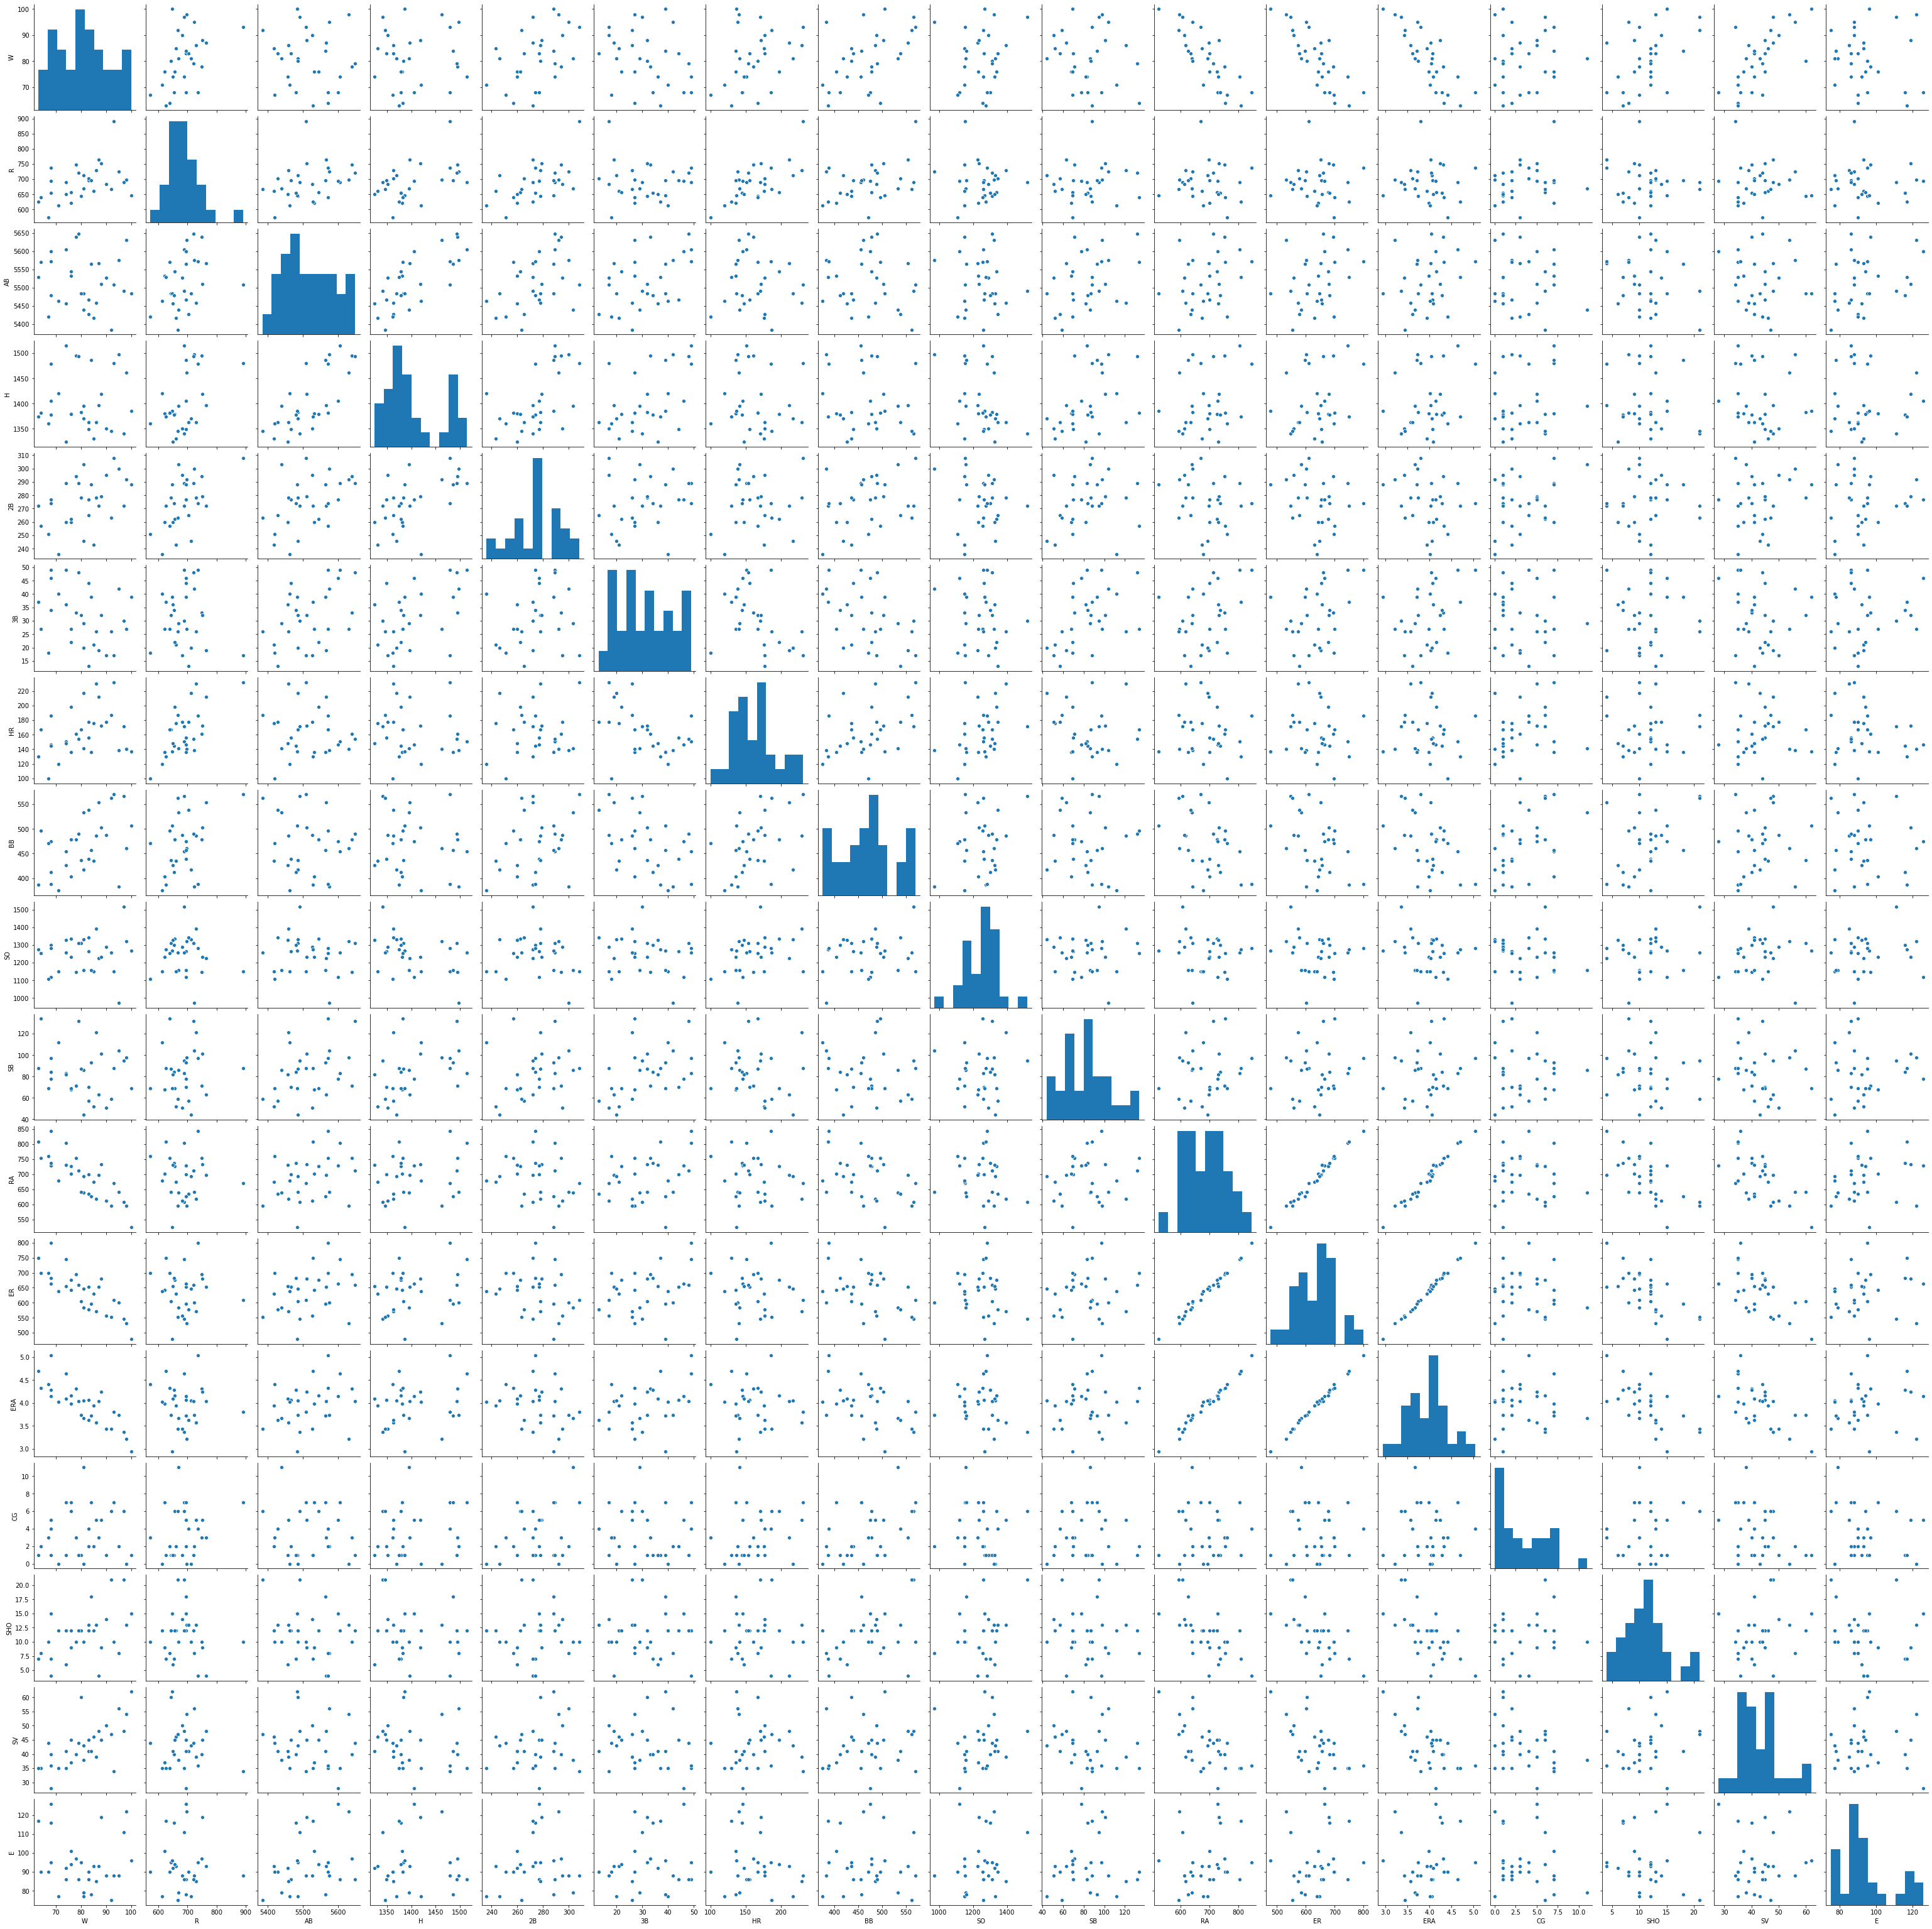

In [76]:
sns.pairplot(df)

Only "RA","ER" and "ERA" shows trend with the target feature W.Also,These feature shows realtionship with each other.We'll analyse them in further steps.

In [77]:
# Using scatterplot to see relationship between the above mentioned features.

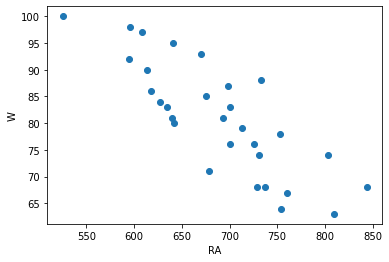

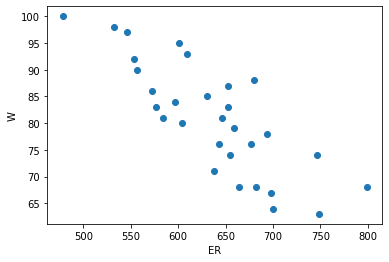

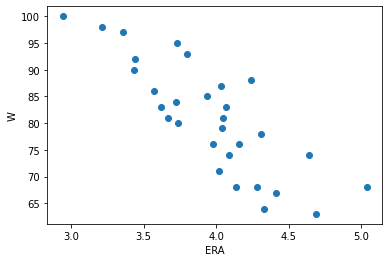

In [78]:
for i in df[['RA', 'ER','ERA']]:
    x = df[i]
    y = df["W"]
    plt.xlabel(i)
    plt.ylabel("W")
    plt.scatter(x,y)
    plt.show()

Observations:
1. As runs allowed(RA) increases the Number of wins decreases.
2. As Earned runs (ER) increases the number of wins decreases.
3. As Earned run average(ERA) increases the number of wins decreases.

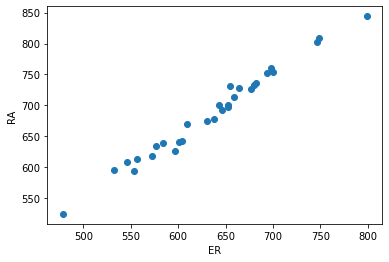

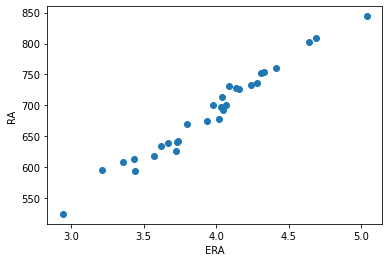

In [84]:
for i in df[['ER','ERA']]:
    x = df[i]
    y = df['RA']
    plt.xlabel(i)
    plt.ylabel('RA')
    plt.scatter(x,y)
    plt.show()

Observations:
As RA(runs allowed) increases both ER(earned runs) and ERA(earned runs average)

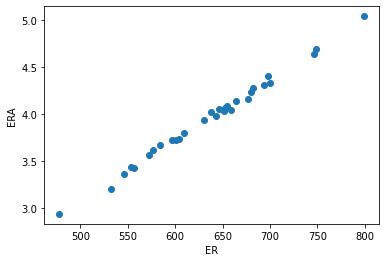

In [87]:
#Relationship between Earned runs and  Earned runs average
x = df['ER']
y = df['ERA']
plt.xlabel('ER')
plt.ylabel('ERA')
plt.scatter(x,y)
plt.show()

When ER(earned runs)increases, ERA(earned runs average) also increases.

In [88]:
#checking co realtion with the help of heatmap

In [89]:
corr_matrix = df.corr()

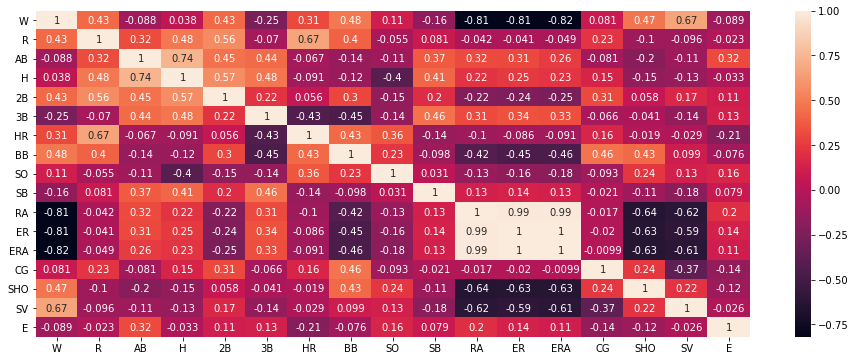

In [90]:
plt.figure(figsize = [16,6])
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [94]:
highly_positive = input("Features showing correlation more than 0.7 \n")
print("The above features are Highly correlated")
negative2 = input("Features showing Correlation below  -0.6 \n")
print("The above features are Highly negatively correlated")

Features showing correlation more than 0.7 
AB and H(0.74),RA and ER(0.99),RA and ERA(0.99)
The above features are Highly correlated
Features showing Correlation below  -0.6 
W and RA(-0.81),W and ER(-0.81),W and ERA(-0.82),RA and SHO(-0.64),RA and SV(-0.62),ER and SHO(-0.63),ERA and SHO(-0.63),ERA and SV(-0.61).
The above features are Highly negatively correlated


In [95]:
#checking co relation of all features with target feature("W")

In [96]:
print(corr_matrix['W'].sort_values(ascending = False))

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64


Features which are positively correlated to target variable:
1. SV ,BB,SHO,R ,2B and HR

Features negatively correlated to target variable :
2. SB,3B,ER,RA,ERA

In [102]:
#cleaning data

checking for outliers present in the data set

In [104]:
#removing outlier
from scipy.stats import zscore
z = np.abs(zscore(df))

In [107]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [108]:
df_new = df[(z<3).all(axis = 1)]

In [109]:
df_new.shape

(29, 17)

Since the dataset is too small and the there is only one outlier will will not remove it.

checking for skewness

In [239]:
x4 = df.drop("W",axis = 1)

In [240]:
y = df["W"]

In [193]:
from scipy.stats import boxcox

In [221]:
#using deature selection techique

In [235]:
from sklearn.ensemble import RandomForestRegressor

In [241]:
x_train,x_test,y_train,y_test = train_test_split(x4,y,test_size = .20,random_state = 10)

In [242]:
scaling = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E']

In [357]:
from sklearn.preprocessing import MinMaxScaler

In [317]:
ms = MinMaxScaler()
for i in x4:
    x4[i]= ms.fit_transform(x4[[i]])

In [318]:
x4

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431
3,0.154088,0.560606,0.298429,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.264706,0.509804
4,0.364780,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.205882,0.215686
5,1.000000,0.469697,0.816754,1.000000,0.111111,1.000000,1.000000,0.326606,0.488889,0.454545,0.408100,0.409524,0.636364,0.352941,0.176471,0.254902
6,0.600629,0.689394,0.382199,0.500000,0.166667,0.848485,0.917949,0.466055,0.211111,0.542320,0.542056,0.519048,0.272727,0.000000,0.588235,0.352941
7,0.440252,0.378788,0.240838,0.138889,0.194444,0.886364,0.220513,0.656881,0.000000,0.526646,0.523364,0.528571,0.000000,0.352941,0.441176,0.039216
8,0.223270,0.378788,0.308901,0.583333,0.527778,0.507576,0.312821,0.618349,0.477778,0.366771,0.392523,0.380952,0.090909,0.470588,0.941176,0.392157
9,0.550314,0.965909,0.895288,0.805556,0.555556,0.462121,0.528205,0.321101,0.300000,0.714734,0.672897,0.652381,0.272727,0.352941,0.352941,0.431373


In [319]:
x4.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [358]:
#removing skewness

In [366]:
from sklearn.preprocessing import PowerTransformer

In [367]:
power = PowerTransformer()

In [368]:
x4["R"] = power.fit_transform(x4[["R"]])

In [369]:
x4.skew()

R     -0.040229
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [376]:
x4["H"] = power.fit_transform(x4[["H"]])

In [378]:
x4["CG"] = power.fit_transform(x4[["CG"]])

In [381]:
x4["SV"] = power.fit_transform(x4[["SV"]])

In [382]:
x4["E"] = power.fit_transform(x4[["E"]])

In [383]:
x4.skew()

R     -0.040229
AB     0.183437
H      0.090749
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.086121
SHO    0.565790
SV     0.001593
E      0.050334
dtype: float64

In [384]:
#checking the best random state for the model accuracy
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,30):
    x_train,x_test,y_train,y_test = train_test_split(x4,y,test_size = .20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = r2_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.9420745191100542 at random state :  5


Maximum accuracy is at random state 5

In [385]:
x_train,x_test,y_train,y_test = train_test_split(x4,y,test_size = .20,random_state = 5)

In [386]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdlr)*100)
print("Mean Squared error :",mean_squared_error(y_test,prdlr))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdlr))

Accuracy of the model : 94.20745191100542
Mean Squared error : 6.5729330398730115
Mean Absolute eroor : 2.3127665414606065


In [387]:
print("The accuracy of the Linear Regression Model is : " ,round(r2_score(y_test,prdlr)*100,3) )

The accuracy of the Linear Regression Model is :  94.207


In [388]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdtc))
print("Mean Squared error :",mean_squared_error(y_test,prdtc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdtc))

Accuracy of the model : 0.355201958384333
Mean Squared error : 73.16666666666667
Mean Absolute eroor : 8.5


In [390]:
print("The accuracy of the DecisionTreeRegressor Model is : " ,round(r2_score(y_test,prdtc)*100,3) )

The accuracy of the DecisionTreeRegressor Model is :  35.52


In [389]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
prrfc = rfc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prrfc))
print("Mean Squared error :",mean_squared_error(y_test,prrfc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prrfc))

Accuracy of the model : 0.6405770869033048
Mean Squared error : 40.78451666666666
Mean Absolute eroor : 5.491666666666667


In [391]:
print("The accuracy of the Random Forest Regressor Model is : " ,round(r2_score(y_test,prrfc)*100,3) )

The accuracy of the Random Forest Regressor Model is :  64.058


In [392]:
from sklearn.svm import SVR
svr = SVR(kernel = "linear")
svr.fit(x_train,y_train)
prdsvr = svr.predict(x_test)
print("Accuracy of the SVR  model for is",r2_score(y_test,prdsvr))
print("Mean Squared error SVR  model for is",mean_squared_error(y_test,prdsvr))
print("Mean Absolute eroor SVR  model for is:",mean_absolute_error(y_test,prdsvr))

Accuracy of the SVR  model for is 0.6506898164484859
Mean Squared error SVR  model for is 39.63700277244265
Mean Absolute eroor SVR  model for is: 5.794301112849112


In [393]:
print("The accuracy of the Support Vector Regressor Model is : " ,round(r2_score(y_test,prdsvr)*100,3) )

The accuracy of the Support Vector Regressor Model is :  65.069


In [394]:
from sklearn.model_selection import cross_val_score

In [425]:
cross_val1 = cross_val_score(LinearRegression(),x4,y,cv = 5)
print("Cross Validation score for Linear regression : ",(np.abs(cross_val1)).mean())

Cross Validation score for Linear regression :  0.8686654240571196


In [423]:
cross_val2 = cross_val_score(RandomForestRegressor(),x4,y,cv = 5)
print("Cross Validation Score for Random Forest Regressor",np.abs(cross_val2.mean()))

Cross Validation Score for Random Forest Regressor 0.5803089746461061


In [426]:
cross_val3 = cross_val_score(DecisionTreeRegressor(),x4,y,cv = 5)
print("Cross Validation Score for Decision Tree Regressor",np.abs(cross_val3.mean()))

Cross Validation Score for Decision Tree Regressor 1.7842594444142588


In [428]:
cross_val4 = cross_val_score(SVR(),x4,y,cv = 5)
print("Cross Validation Score for SVR",np.abs(cross_val4.mean()))

Cross Validation Score for SVR 0.3159107180140061


Conclusion:

As we can see that among all the models linear regression shows the minimum deviation and high accuracy.

### Hyperparameter tuning

In [429]:
from sklearn.model_selection import GridSearchCV

In [434]:
parameters = {'n_jobs': np.arange(1,100)}

In [435]:
GVC = GridSearchCV(LinearRegression(),parameters,cv=5)

In [436]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [437]:
GVC.best_params_

{'n_jobs': 1}

In [439]:
mod = LinearRegression(n_jobs = 1)

In [440]:
mod.fit(x_train,y_train)

LinearRegression(n_jobs=1)

In [450]:
pred1 = mod.predict(x_test)

In [451]:
print("accuracy :" ,r2_score(y_test,pred1))

accuracy : 0.9420745191100542


In [448]:
conclusion = pd.DataFrame([mod.predict(x_test)[:],prdlr[:]],index = ["predicted","original"])

In [452]:
conclusion

,0,1,2,3,4,5
predicted,84.302982,64.826977,64.440413,91.542542,71.941267,85.951754
original,84.302982,64.826977,64.440413,91.542542,71.941267,85.951754
